In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
#pip install -U sentence-transformers

In [3]:
#from sentence_transformers import SentenceTransformer
#from sklearn.cluster import KMeans

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import json
from collections import Counter
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize 
import operator
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


In [5]:
#!pip install pyLDAvis

In [6]:

from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
#import pyldavis
#import pyLDAvis.gensim_models # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [7]:
import numpy as np 
import pandas as pd 

In [8]:
#embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')


In [9]:
#df=pd.read_csv('benefitsdata.csv')
#df.head()

In [10]:
df=pd.read_csv('cashbackdata.csv')
df.head()

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,Flipkart Axis Bank Credit Card,NaN
2,Flipkart Axis Bank Credit Card,NaN
3,Axis Bank Privilege Credit Card,NaN
4,Axis Bank Privilege Credit Card,NaN


In [11]:
#df =df[0:100]

In [12]:
df.info()
df.describe()
df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CardVariant  675 non-null    object
 1   Cashback     138 non-null    object
dtypes: object(2)
memory usage: 10.7+ KB


,CardVariant,Cashback
count,675,138
unique,188,122
top,Lifestyle Home Centre SBI Card PRIME,Enjoy 10 Reward Points on every 100 Rs. spent ...
freq,13,3


<bound method DataFrame.info of                          CardVariant  \
0     Flipkart Axis Bank Credit Card   
1     Flipkart Axis Bank Credit Card   
2     Flipkart Axis Bank Credit Card   
3    Axis Bank Privilege Credit Card   
4    Axis Bank Privilege Credit Card   
..                               ...   
672   SBI ELITE Business Credit Card   
673   SBI ELITE Business Credit Card   
674   SBI ELITE Business Credit Card   
675   SBI ELITE Business Credit Card   
676   SBI ELITE Business Credit Card   

                                              Cashback  
0    5% cashback on Flipkart & Myntra. 4% cashback ...  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
672                                                NaN  
673                            

In [13]:
df1 = df.copy(deep=True)
df1.head()
df1.shape

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,Flipkart Axis Bank Credit Card,NaN
2,Flipkart Axis Bank Credit Card,NaN
3,Axis Bank Privilege Credit Card,NaN
4,Axis Bank Privilege Credit Card,NaN


(677, 2)

In [14]:
df = df[df['Cashback'].notna()]

In [15]:
df.reset_index(inplace = True, drop = True)

In [16]:
df2 = df.copy(deep=True)
df2.head()
df2.shape

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,AXIS Bank SELECT Credit Card,Earn 10 Axis EDGE points on every Rs. 200 spen...
2,Axis Bank Vistara Credit Card,Earn 2 CV Points* for every Rs 200 spent on th...
3,Axis Bank Vistara Signature Credit Card,Earn 4 CV Points* for every Rs. 200 spent on t...
4,Axis Bank Vistara Infinite Credit Card,Earn 6 CV Points* for every Rs. 200 spent on t...


(138, 2)

In [17]:
df['Cashback'] = df['Cashback'].astype("string")

In [18]:
df.head()

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,AXIS Bank SELECT Credit Card,Earn 10 Axis EDGE points on every Rs. 200 spen...
2,Axis Bank Vistara Credit Card,Earn 2 CV Points* for every Rs 200 spent on th...
3,Axis Bank Vistara Signature Credit Card,Earn 4 CV Points* for every Rs. 200 spent on t...
4,Axis Bank Vistara Infinite Credit Card,Earn 6 CV Points* for every Rs. 200 spent on t...


In [19]:
df.to_csv('cashback_final.csv')

In [20]:
df.info

<bound method DataFrame.info of                                         CardVariant  \
0                    Flipkart Axis Bank Credit Card   
1                      AXIS Bank SELECT Credit Card   
2                     Axis Bank Vistara Credit Card   
3           Axis Bank Vistara Signature Credit Card   
4            Axis Bank Vistara Infinite Credit Card   
..                                              ...   
133                     Karur Vysya Bank - SBI Card   
134  Bank of Maharashtra - SBI Platinum Credit Card   
135                  Bank of Maharashtra - SBI Card   
136                  SBI PRIME Business Credit Card   
137                  SBI ELITE Business Credit Card   

                                              Cashback  
0    5% cashback on Flipkart & Myntra. 4% cashback ...  
1    Earn 10 Axis EDGE points on every Rs. 200 spen...  
2    Earn 2 CV Points* for every Rs 200 spent on th...  
3    Earn 4 CV Points* for every Rs. 200 spent on t...  
4    Earn 6 CV Points*

# Text Pre Processing & EDA

In [21]:
stop_words = nltk.corpus.stopwords.words('english')

In [22]:
porter = PorterStemmer()

In [23]:
#stemmer = SnowballStemmer("english")
preprocess_cashback=[]
for s in tqdm(df['Cashback'].values):
    #s=re.sub(r'S*\d\S*','',s)
    s=re.sub('[^a-zA-Z]',' ',s)
 #   s=re.sub('[^a-zA-Z0-9]',' ',s)
#     soup=BeautifulSoup(s)
#     s=soup.get_text()
    s=re.sub(r'http\S+','',s)
    words=word_tokenize(s.lower())

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    s=' '.join(str(j) for j in words if j not in stop_words and (len(j)!=1 ))
    preprocess_cashback.append(s.strip())

100%|██████████| 138/138 [00:00<00:00, 1360.41it/s]


In [24]:
preprocess_cashback

['cashback flipkart myntra cashback preferred merchants cashback categories',
 'earn axis edge points every rs spends earn per rs retail shopping spends',
 'earn cv points every rs spent axis bank vistara credit card redeem upgrades award flights faster options redeem points get bonus cv points upto economy class tickets achieving milestone spends',
 'earn cv points every rs spent axis bank vistara signature credit card redeem upgrades award flights options redeem points get bonus cv points complimentary premium economy tickets achieving milestone spends',
 'earn cv points every rs spent axis bank vistara infinite credit card redeem upgrades award flights faster options redeem points get bonus cv points complimentary business class tickets achieving milestone spends',
 'cashback freecharge spends cashback spends',
 'spends',
 'cashback online box office movie ticket purchases week zone easy credit card reward points earned movie offer transactions amount cashback calendar year limited 

In [25]:
#corpus = df["Cashback"].tolist()
#data = preprocess_cashback

In [26]:
#type(data)

In [98]:
def wordcloud(msg_lst):
    word_tokens =[]
    for msg in msg_lst:
        word_tokens.extend(word_tokenize(msg))
    #tokenize words from extracted text
     
    #word_tokens = [tok for tok in data.split()]
    #print(" \n word tokens are : ",word_tokens[:25]) 
    
    #define stopwords form nltk
    stopWords = stopwords.words('english')
    # define custom stop words
    # removing oxygen and oxgencrisis words from tokens list
#     stopWords2 = ['1','2','3','4','5','6','7','8','9','0','`','~','!','@','#','$','%','^','&','*','(',')','-','_','=',
#               '+','[',']','{','}','\\','|',':',';','/','"','<','>',',','.','?',"'",'"',"'s",'’','–','.','“','—','--',
#                   'http','https','...','..','…',"n't",'oxygen','oxygenemergency','भारत_का_गुनेहगार_मोदी','भारत_का_कुपुत्र_मोदी','co']
    
    #filter words(tokens) by removing stop words, numbers, special charactes and symbols
    #stopWords2 = ['http','https','000','rs','100','150','10','per']
    stopWords.extend(['http','https','000','rs','100','150','10','per','get','every','spent','spends','point','points','credit',
                     'card','20','reward','earn','lakh','annual','payback', 'cashback','rewards','enjoy','purchases','redeem','except fuel',
                     'bank','5x','categories','icici','month','spend','select','non fuel','redemption','upto','50','200','500',
                     '60','15','10x','except','fuel','non','convert','bonus','via','25','year','maximum','worth','instantly','payments',
                     'lakhs','sbi','axis','hdfc','day','com','www','co','cv'])
    wordsFiltered = []
    for w in word_tokens:
        if  w.lower() not in stopWords:
            wordsFiltered.append(w.lower())
    #print("\n length of filtered tokens is : ",len(wordsFiltered))
    #print("\n filtered tokens are : ",wordsFiltered[:25])
    
    #get frequency distribution of filtered words
    Freq_dist_nltk=nltk.FreqDist(wordsFiltered)
    
    #sort the tokens based on the frequency distribution in descending order
    sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
    #print("\n frequency distribution of filtered and sorted tokens :",sorted_d[:25])
    print("\n frequency distribution nltk graph : ")
    #plot frequency distribution graph for top 25 frequent words
    Freq_dist_nltk.plot(25, cumulative=False)
    
    words_df = pd.DataFrame({'word':list(Freq_dist_nltk.keys()),   
             'count':list(Freq_dist_nltk.values())}) 
      # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = 10)      
    plt.figure(figsize=(10,7)) 
    ax = sns.barplot(data=d, x= "word", y = "count") 
    ax.set(ylabel = 'Count') 
    plt.show()
    
    print("\n wordcloud graph : ")
    #plot wordcloud graph
    wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(Freq_dist_nltk)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")


 frequency distribution nltk graph : 


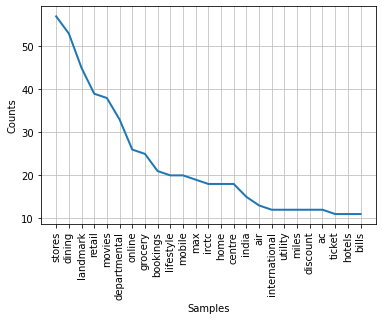

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:332: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


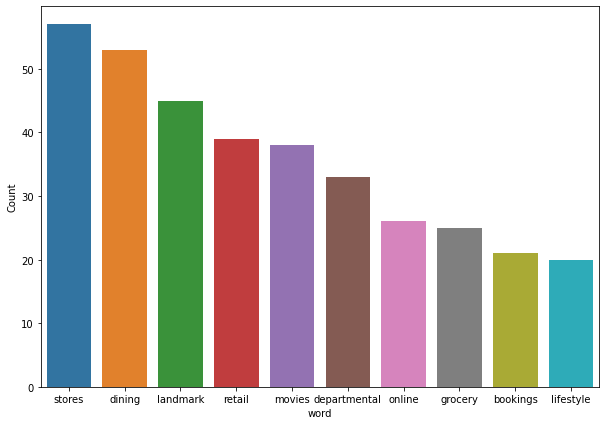


 wordcloud graph : 


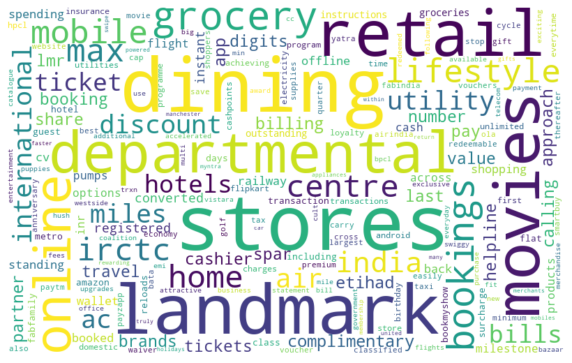

In [99]:
wordcloud(preprocess_cashback) 

In [25]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['http','https','000','rs','100','150','10','per','get','every','spent','spends','point','points','credit',
                     'card','20','reward','earn','lakh','annual','payback', 'cashback','rewards','enjoy','purchases','redeem','except fuel',
                     'bank','5x','categories','icici','month','spend','select','non fuel','redemption','upto','50','200','500',
                     '60','15','10x','except','fuel','non','convert','bonus','via','25','year','maximum','worth','instantly','payments',
                     'lakhs','sbi','axis','hdfc','day','com','www','co','cv'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


[nltk_data] Downloading package stopwords to /Users/ravi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
data = preprocess_cashback
data_words = list(sent_to_words(data))
data_words
# remove stop words
data_words = remove_stopwords(data_words)
data_words
print(data_words[:1][0][:30])

[['cashback',
  'flipkart',
  'myntra',
  'cashback',
  'preferred',
  'merchants',
  'cashback',
  'categories'],
 ['earn',
  'axis',
  'edge',
  'points',
  'every',
  'rs',
  'spends',
  'earn',
  'per',
  'rs',
  'retail',
  'shopping',
  'spends'],
 ['earn',
  'cv',
  'points',
  'every',
  'rs',
  'spent',
  'axis',
  'bank',
  'vistara',
  'credit',
  'card',
  'redeem',
  'upgrades',
  'award',
  'flights',
  'faster',
  'options',
  'redeem',
  'points',
  'get',
  'bonus',
  'cv',
  'points',
  'upto',
  'economy',
  'class',
  'tickets',
  'achieving',
  'milestone',
  'spends'],
 ['earn',
  'cv',
  'points',
  'every',
  'rs',
  'spent',
  'axis',
  'bank',
  'vistara',
  'signature',
  'credit',
  'card',
  'redeem',
  'upgrades',
  'award',
  'flights',
  'options',
  'redeem',
  'points',
  'get',
  'bonus',
  'cv',
  'points',
  'complimentary',
  'premium',
  'economy',
  'tickets',
  'achieving',
  'milestone',
  'spends'],
 ['earn',
  'cv',
  'points',
  'every',
  '

[['flipkart', 'myntra', 'preferred', 'merchants'],
 ['edge', 'retail', 'shopping'],
 ['vistara',
  'upgrades',
  'award',
  'flights',
  'faster',
  'options',
  'economy',
  'class',
  'tickets',
  'achieving',
  'milestone'],
 ['vistara',
  'signature',
  'upgrades',
  'award',
  'flights',
  'options',
  'complimentary',
  'premium',
  'economy',
  'tickets',
  'achieving',
  'milestone'],
 ['vistara',
  'infinite',
  'upgrades',
  'award',
  'flights',
  'faster',
  'options',
  'complimentary',
  'business',
  'class',
  'tickets',
  'achieving',
  'milestone'],
 ['freecharge'],
 [],
 ['online',
  'box',
  'office',
  'movie',
  'ticket',
  'week',
  'zone',
  'easy',
  'earned',
  'movie',
  'offer',
  'transactions',
  'amount',
  'calendar',
  'limited'],
 ['bare',
  'fare',
  'domestic',
  'flight',
  'bookings',
  'time',
  'ticket',
  'booked',
  'wings',
  'tickets',
  'booked',
  'irctc',
  'transaction',
  'benefits',
  'cardholder',
  'booking',
  'domestic',
  'return',

['flipkart', 'myntra', 'preferred', 'merchants']


In [27]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['flipkart', 'myntra', 'preferred', 'merchants']


In [28]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [29]:
#conda install -c conda-forge spacy  #one time run in cmd prompt
#python -m spacy download en #one time run in cmd prompt

In [30]:
#spacy.cli.download("en_core_web_sm")

In [31]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)



In [32]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['flipkart', 'myntra', 'prefer', 'merchant']]


In [33]:
data_lemmatized [:3]

[['flipkart', 'myntra', 'prefer', 'merchant'],
 ['edge', 'retail', 'shopping'],
 ['vistara',
  'upgrade',
  'award',
  'flight',
  'fast',
  'option',
  'economy',
  'class',
  'ticket',
  'achieve',
  'milestone']]

In [34]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [35]:
id2word[0]

'flipkart'

In [36]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('flipkart', 1), ('merchant', 1), ('myntra', 1), ('prefer', 1)]]

# LDA

In [37]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                           update_every=1,
                                           chunksize=5,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
doc_lda

[(0,
  '0.089*"landmark" + 0.052*"online" + 0.037*"max" + 0.037*"billing" + '
  '0.030*"lmr" + 0.030*"spar" + 0.030*"share" + 0.030*"register" + '
  '0.030*"number" + 0.030*"last"'),
 (1,
  '0.116*"grocery" + 0.105*"hotel" + 0.095*"booking" + 0.056*"utility" + '
  '0.039*"value" + 0.035*"mile" + 0.034*"dining" + 0.031*"ticket" + '
  '0.031*"flight" + 0.030*"instruction"'),
 (2,
  '0.191*"store" + 0.132*"departmental" + 0.061*"bill" + 0.061*"retail" + '
  '0.024*"gift" + 0.023*"brand" + 0.022*"stop" + 0.022*"shopper" + '
  '0.022*"spending" + 0.021*"voucher"'),
 (3,
  '0.234*"dine" + 0.201*"movie" + 0.052*"birthday" + 0.047*"day" + '
  '0.045*"first" + 0.033*"railway" + 0.032*"fee" + 0.015*"fabfamily" + '
  '0.012*"entertainment" + 0.012*"limit"'),
 (4,
  '0.080*"discount" + 0.067*"complimentary" + 0.046*"flat" + 0.045*"cash" + '
  '0.045*"classified" + 0.045*"carry" + 0.045*"golf" + 0.033*"quarter" + '
  '0.023*"etihad" + 0.023*"loyalty"')]


In [38]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.00858150825195

Coherence Score:  0.5961885670482582


In [39]:
#pip install pyldavis

In [40]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [41]:
# Visualize the topics
pyLDAvis.enable_notebook()


In [42]:
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.272604  0.012344       1        1  27.400762
0     -0.055530 -0.005298       2        1  24.210383
1      0.196932  0.273818       3        1  23.933646
4      0.192002 -0.268705       4        1  12.564479
3     -0.060800 -0.012159       5        1  11.890730, topic_info=             Term       Freq      Total Category  logprob  loglift
119         store  75.000000  75.000000  Default  30.0000  30.0000
153          dine  40.000000  40.000000  Default  29.0000  29.0000
29          movie  35.000000  35.000000  Default  28.0000  28.0000
111  departmental  52.000000  52.000000  Default  27.0000  27.0000
177       grocery  40.000000  40.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
282      continue   0.517122   3.441848   Topic5  -5.7997   0.2339
283    cumulative   0.517122   3.441848   Topic5  -5.7997   0.2339
284        policy   0.517122   3.441848   Topic5  -5.7997   0.2339
285           top   0.517122   3.441848   Topic5  -5.7997   0.2339
280        accrue   0.458999   6.269256   Topic5  -5.9189  -0.4850

[196 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
294       4  0.814774    access
214       2  1.003232   account
280       1  0.797543    accrue
7         1  0.868632   achieve
35        3  0.960599       air
...     ...       ...       ...
200       4  0.587100    waiver
125       2  0.911986    wallet
166       3  0.856171   website
291       1  0.902136  westside
292       1  0.902136     yatra

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 5, 4])

In [43]:
#pyLDAvis.display(vis)


In [44]:
#type(lda_model[corpus])

In [45]:
# #Building LDA Mallet Model
# # Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

In [46]:
# # Show Topics
# pprint(ldamallet.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

In [47]:
#How to find the optimal number of topics for LDA?
#build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #print('number of topics : '+ str(num_topics))
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                           update_every=1,
                                           chunksize=8,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        print('number of topics : '+ str(num_topics)+' | coherence value : '+str(coherencemodel.get_coherence()))
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [48]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=12, step=1)

number of topics : 2 | coherence value : 0.5715772482594539
number of topics : 3 | coherence value : 0.7026084277514418
number of topics : 4 | coherence value : 0.4462361731095993
number of topics : 5 | coherence value : 0.5915599084321597
number of topics : 6 | coherence value : 0.5955142749121096
number of topics : 7 | coherence value : 0.5613935647858651
number of topics : 8 | coherence value : 0.5489555080722485
number of topics : 9 | coherence value : 0.494176494065921
number of topics : 10 | coherence value : 0.5280783526244732
number of topics : 11 | coherence value : 0.5039077832409835


Text(0.5, 0, 'Num Topics')

Text(0, 0.5, 'Coherence score')

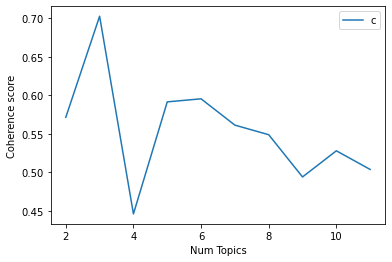

In [49]:
# Show graph
limit=12; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [50]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

#If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out

Num Topics = 2  has Coherence Value of 0.572
Num Topics = 3  has Coherence Value of 0.703
Num Topics = 4  has Coherence Value of 0.446
Num Topics = 5  has Coherence Value of 0.592
Num Topics = 6  has Coherence Value of 0.596
Num Topics = 7  has Coherence Value of 0.561
Num Topics = 8  has Coherence Value of 0.549
Num Topics = 9  has Coherence Value of 0.494
Num Topics = 10  has Coherence Value of 0.528
Num Topics = 11  has Coherence Value of 0.504


In [51]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=12))

[(0,
  '0.061*"landmark" + 0.039*"online" + 0.024*"billing" + 0.024*"max" + '
  '0.021*"lmr" + 0.021*"share" + 0.021*"number" + 0.021*"convert" + '
  '0.021*"approach" + 0.021*"spar" + 0.021*"centre" + 0.021*"cashier"'),
 (1,
  '0.063*"hotel" + 0.053*"booking" + 0.050*"discount" + 0.045*"complimentary" '
  '+ 0.031*"flat" + 0.031*"cash" + 0.030*"carry" + 0.030*"classified" + '
  '0.030*"golf" + 0.023*"quarter" + 0.018*"dine" + 0.018*"flight"'),
 (2,
  '0.098*"store" + 0.076*"grocery" + 0.076*"departmental" + 0.072*"movie" + '
  '0.050*"dine" + 0.032*"dining" + 0.032*"retail" + 0.021*"bill" + '
  '0.020*"instruction" + 0.020*"stand" + 0.019*"utility" + 0.015*"birthday"')]


In [52]:
optmod_vis = gensimvis.prepare(optimal_model, corpus, id2word)
optmod_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.096232  0.215877       1        1  38.882214
1     -0.285018 -0.042170       2        1  31.030615
0      0.188786 -0.173707       3        1  30.087171, topic_info=             Term       Freq      Total Category  logprob  loglift
177       grocery  42.000000  42.000000  Default  30.0000  30.0000
111  departmental  42.000000  42.000000  Default  29.0000  29.0000
29          movie  40.000000  40.000000  Default  28.0000  28.0000
119         store  62.000000  62.000000  Default  27.0000  27.0000
225      landmark  26.000000  26.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
176     statement   2.556283   2.927658   Topic3  -5.1300   1.0654
124        reload   2.229704   2.598569   Topic3  -5.2667   1.0480
130        amazon   3.246527   3.813770   Topic3  -4.8910   1.0400
93      lifestyle   6.845503   8.439066   Topic3  -4.1450   0.9918
96         mobile   6.115763  10.788998   Topic3  -4.2577   0.6334

[136 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
294       2  0.944718    access
280       1  0.940074    accrue
7         1  0.922849   achieve
130       3  0.786623    amazon
215       3  0.954994  approach
...     ...       ...       ...
125       3  0.951255    wallet
291       1  0.118211  westside
291       3  0.945687  westside
292       1  0.118211     yatra
292       3  0.945687     yatra

[126 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [53]:
#Finding the dominant topic in each sentence
#find the topic number that has the highest percentage contribution in that document.
#The format_topics_sentences() function below nicely aggregates this information in a presentable table.

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        #row = sorted(row, key=lambda x: (x[1]), reverse=True)
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)




In [54]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.9497,"landmark, online, billing, max, lmr, share, nu...",cashback flipkart myntra cashback preferred me...
1,1,2,0.9541,"store, grocery, departmental, movie, dine, din...",earn axis edge points every rs spends earn per...
2,2,0,0.4306,"landmark, online, billing, max, lmr, share, nu...",earn cv points every rs spent axis bank vistar...
3,3,1,0.3760,"hotel, booking, discount, complimentary, flat,...",earn cv points every rs spent axis bank vistar...
4,4,1,0.4302,"hotel, booking, discount, complimentary, flat,...",earn cv points every rs spent axis bank vistar...
5,5,0,0.8314,"landmark, online, billing, max, lmr, share, nu...",cashback freecharge spends cashback spends
6,6,2,0.4595,"store, grocery, departmental, movie, dine, din...",spends
7,7,2,0.8195,"store, grocery, departmental, movie, dine, din...",cashback online box office movie ticket purcha...
8,8,1,0.9963,"hotel, booking, discount, complimentary, flat,...",cashback bare fare domestic flight bookings rs...
9,9,0,0.7628,"landmark, online, billing, max, lmr, share, nu...",earn payback points icici bank rewards every r...


In [55]:
df_final= df_dominant_topic[['Dominant_Topic',  'Keywords', 'Text']]

In [56]:
df_final

,Dominant_Topic,Keywords,Text
0,0,"landmark, online, billing, max, lmr, share, nu...",cashback flipkart myntra cashback preferred me...
1,2,"store, grocery, departmental, movie, dine, din...",earn axis edge points every rs spends earn per...
2,0,"landmark, online, billing, max, lmr, share, nu...",earn cv points every rs spent axis bank vistar...
3,1,"hotel, booking, discount, complimentary, flat,...",earn cv points every rs spent axis bank vistar...
4,1,"hotel, booking, discount, complimentary, flat,...",earn cv points every rs spent axis bank vistar...
...,...,...,...
133,2,"store, grocery, departmental, movie, dine, din...",enjoy value back get reward points per rs spen...
134,0,"landmark, online, billing, max, lmr, share, nu...",earn reward points every rs spent categories g...
135,2,"store, grocery, departmental, movie, dine, din...",enjoy value back get reward points per rs spen...
136,1,"hotel, booking, discount, complimentary, flat,...",get reward points per rs spent dining utility ...


In [57]:
df2.head()

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,AXIS Bank SELECT Credit Card,Earn 10 Axis EDGE points on every Rs. 200 spen...
2,Axis Bank Vistara Credit Card,Earn 2 CV Points* for every Rs 200 spent on th...
3,Axis Bank Vistara Signature Credit Card,Earn 4 CV Points* for every Rs. 200 spent on t...
4,Axis Bank Vistara Infinite Credit Card,Earn 6 CV Points* for every Rs. 200 spent on t...


In [58]:
df2['CardVariant']

0                      Flipkart Axis Bank Credit Card
1                        AXIS Bank SELECT Credit Card
2                       Axis Bank Vistara Credit Card
3             Axis Bank Vistara Signature Credit Card
4              Axis Bank Vistara Infinite Credit Card
                            ...                      
133                       Karur Vysya Bank - SBI Card
134    Bank of Maharashtra - SBI Platinum Credit Card
135                    Bank of Maharashtra - SBI Card
136                    SBI PRIME Business Credit Card
137                    SBI ELITE Business Credit Card
Name: CardVariant, Length: 138, dtype: object

In [59]:
#df2.reset_index(inplace = True, drop = True)

In [60]:
df_final['CardVariant'] = df2['CardVariant']

In [136]:
df_final.head()

,Dominant_Topic,Keywords,Text,CardVariant
0,3,"landmark, retail, online, mobile, call, billin...",cashback flipkart myntra cashback preferred me...,Flipkart Axis Bank Credit Card
1,3,"landmark, retail, online, mobile, call, billin...",earn axis edge points every rs spends earn per...,AXIS Bank SELECT Credit Card
2,2,"gift, brand, spending, shopper, stop, voucher,...",earn cv points every rs spent axis bank vistar...,Axis Bank Vistara Credit Card
3,2,"gift, brand, spending, shopper, stop, voucher,...",earn cv points every rs spent axis bank vistar...,Axis Bank Vistara Signature Credit Card
4,2,"gift, brand, spending, shopper, stop, voucher,...",earn cv points every rs spent axis bank vistar...,Axis Bank Vistara Infinite Credit Card


In [61]:
df_final.to_csv('topics_final3.csv')

In [62]:
df_cardsgroup = df_final.groupby('Dominant_Topic').agg(lambda x: x.tolist())

In [63]:
df_cardsgroup

,Keywords,Text,CardVariant
Dominant_Topic,,,
0,"[landmark, online, billing, max, lmr, share, n...",[cashback flipkart myntra cashback preferred m...,"[Flipkart Axis Bank Credit Card, Axis Bank Vis..."
1,"[hotel, booking, discount, complimentary, flat...",[earn cv points every rs spent axis bank vista...,"[Axis Bank Vistara Signature Credit Card, Axis..."
2,"[store, grocery, departmental, movie, dine, di...",[earn axis edge points every rs spends earn pe...,"[AXIS Bank SELECT Credit Card, Axis bank ACE C..."


In [64]:
#Find the most representative document for each topic
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0,0.9868,"landmark, online, billing, max, lmr, share, nu...",earn cashpoints favourite merchants big basket...
1,1,0.9963,"hotel, booking, discount, complimentary, flat,...",cashback bare fare domestic flight bookings rs...
2,2,0.9975,"store, grocery, departmental, movie, dine, din...",earn rewards daily essential spends across mob...


# NMF

In [65]:


# Fit NMF model: See [1] for more details
nmf_model = gensim.models.Nmf(
    corpus = corpus,     # Document-Term Matrix
    id2word = id2word,   # Map word IDs to words
    num_topics = 4,     # Number of latent topics to extract
    random_state = 100,
    passes = 100,        # N° of passes through the corpus during training
    )

# Get the topics sorted by sparsity
nmf_model.show_topics()

[(0,
  '0.070*"booking" + 0.055*"book" + 0.051*"hotel" + 0.050*"ticket" + 0.031*"discount" + 0.026*"air" + 0.026*"complimentary" + 0.024*"international" + 0.024*"flat" + 0.022*"domestic"'),
 (1,
  '0.101*"landmark" + 0.070*"retail" + 0.035*"online" + 0.035*"dining" + 0.034*"movie" + 0.034*"billing" + 0.034*"call" + 0.034*"max" + 0.034*"register" + 0.034*"number"'),
 (2,
  '0.105*"store" + 0.089*"grocery" + 0.088*"departmental" + 0.082*"movie" + 0.066*"dine" + 0.028*"dining" + 0.027*"accrue" + 0.027*"utility" + 0.026*"instruction" + 0.026*"stand"'),
 (3,
  '0.051*"pump" + 0.042*"mobile" + 0.034*"bill" + 0.030*"option" + 0.027*"hpcl" + 0.025*"accelerate" + 0.025*"retail" + 0.024*"electricity" + 0.022*"cap" + 0.022*"store"')]

In [66]:
# Compute Coherence Score
coherence_model_nmf = CoherenceModel(model=nmf_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_nmf = coherence_model_nmf.get_coherence()
print('\nCoherence Score: ', coherence_nmf)


Coherence Score:  0.6159261617387516


In [67]:
# Run the coherence model to get the score
cm = CoherenceModel(
        model=nmf_model,
        texts=data_lemmatized,
        dictionary=id2word,
        coherence='c_v'
    )
    
cm.get_coherence()

0.6159261617387516

In [68]:
#How to find the optimal number of topics for NMF?
#build many NMF models with different values of number of topics (k) and pick the one that gives the highest coherence value.

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of NMF topic models
    coherence_values : Coherence values corresponding to the NMF model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #print('number of topics : '+ str(num_topics))
        model = gensim.models.Nmf(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        print('number of topics : '+ str(num_topics)+' | coherence value : '+str(coherencemodel.get_coherence()))
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [69]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=12, step=1)

number of topics : 2 | coherence value : 0.5524746277428373
number of topics : 3 | coherence value : 0.6096521301356416
number of topics : 4 | coherence value : 0.5468339904935722
number of topics : 5 | coherence value : 0.6690048985687386
number of topics : 6 | coherence value : 0.6030978082635284
number of topics : 7 | coherence value : 0.6630371896805042
number of topics : 8 | coherence value : 0.6710954836046987
number of topics : 9 | coherence value : 0.6061721379266151
number of topics : 10 | coherence value : 0.5591080974583363
number of topics : 11 | coherence value : 0.6344961227719216


Text(0.5, 0, 'Num Topics')

Text(0, 0.5, 'Coherence score')

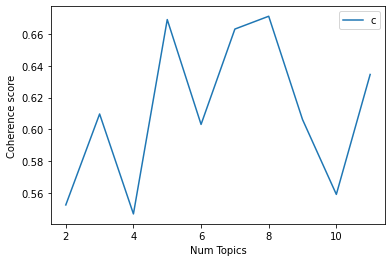

In [70]:
# Show graph
limit=12; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [71]:
# Select the model and print the topics
optimal_nmf_model = model_list[6]
model_topics = optimal_nmf_model.show_topics(formatted=False)
pprint(optimal_nmf_model.print_topics(num_words=12))

[(0,
  '0.132*"book" + 0.108*"ticket" + 0.089*"booking" + 0.059*"domestic" + '
  '0.051*"international" + 0.046*"air" + 0.037*"value" + 0.036*"holiday" + '
  '0.036*"car" + 0.036*"return" + 0.034*"minimum" + 0.023*"flight"'),
 (1,
  '0.056*"booking" + 0.054*"hotel" + 0.038*"bill" + 0.027*"pump" + '
  '0.024*"complimentary" + 0.023*"option" + 0.021*"available" + 0.020*"cash" + '
  '0.019*"electricity" + 0.017*"flat" + 0.016*"travel" + 0.016*"mobile"'),
 (2,
  '0.097*"landmark" + 0.050*"mobile" + 0.050*"call" + 0.049*"store" + '
  '0.048*"movie" + 0.039*"dining" + 0.038*"retail" + 0.035*"billing" + '
  '0.033*"spar" + 0.033*"register" + 0.033*"number" + 0.033*"approach"'),
 (3,
  '0.065*"store" + 0.064*"departmental" + 0.057*"movie" + 0.050*"grocery" + '
  '0.032*"accrue" + 0.031*"cap" + 0.023*"pump" + 0.023*"dining" + 0.023*"bill" '
  '+ 0.020*"achieve" + 0.017*"limit" + 0.016*"top"'),
 (4,
  '0.078*"dine" + 0.076*"irctc" + 0.059*"ticket" + 0.057*"store" + '
  '0.044*"railway" + 0.040*"

In [79]:
#Finding the dominant topic in each sentence
#find the topic number that has the highest percentage contribution in that document.
#The format_topics_sentences() function below nicely aggregates this information in a presentable table.

def format_topics_sentences2(nmfmodel=nmf_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(nmfmodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        #row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = nmfmodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [80]:
df_topic_sents_keywords2 = format_topics_sentences2(nmfmodel=optimal_nmf_model, corpus=corpus, texts=data)

# Format
df_dominant_topic2 = df_topic_sents_keywords2.reset_index()
df_dominant_topic2.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic2.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.6888,"discount, hotel, complimentary, flat, carry, g...",cashback flipkart myntra cashback preferred me...
1,1,5.0,0.7222,"retail, online, landmark, max, helpline, cashi...",earn axis edge points every rs spends earn per...
2,2,0.0,0.3095,"book, ticket, booking, domestic, international...",earn cv points every rs spent axis bank vistar...
3,3,6.0,0.2749,"discount, hotel, complimentary, flat, carry, g...",earn cv points every rs spent axis bank vistar...
4,4,6.0,0.2723,"discount, hotel, complimentary, flat, carry, g...",earn cv points every rs spent axis bank vistar...
5,5,2.0,0.6509,"landmark, mobile, call, store, movie, dining, ...",cashback freecharge spends cashback spends
6,6,3.0,0.3174,"store, departmental, movie, grocery, accrue, c...",spends
7,7,0.0,0.6859,"book, ticket, booking, domestic, international...",cashback online box office movie ticket purcha...
8,8,5.0,0.2988,"retail, online, landmark, max, helpline, cashi...",cashback bare fare domestic flight bookings rs...
9,9,1.0,0.3442,"booking, hotel, bill, pump, complimentary, opt...",earn payback points icici bank rewards every r...


In [81]:
df_final2= df_dominant_topic2[['Dominant_Topic',  'Keywords', 'Text']]

In [82]:
df2.head()

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,AXIS Bank SELECT Credit Card,Earn 10 Axis EDGE points on every Rs. 200 spen...
2,Axis Bank Vistara Credit Card,Earn 2 CV Points* for every Rs 200 spent on th...
3,Axis Bank Vistara Signature Credit Card,Earn 4 CV Points* for every Rs. 200 spent on t...
4,Axis Bank Vistara Infinite Credit Card,Earn 6 CV Points* for every Rs. 200 spent on t...


In [83]:
df_final2['CardVariant'] = df2['CardVariant']

In [84]:
df_final2.head()

,Dominant_Topic,Keywords,Text,CardVariant
0,6.0,"discount, hotel, complimentary, flat, carry, g...",cashback flipkart myntra cashback preferred me...,Flipkart Axis Bank Credit Card
1,5.0,"retail, online, landmark, max, helpline, cashi...",earn axis edge points every rs spends earn per...,AXIS Bank SELECT Credit Card
2,0.0,"book, ticket, booking, domestic, international...",earn cv points every rs spent axis bank vistar...,Axis Bank Vistara Credit Card
3,6.0,"discount, hotel, complimentary, flat, carry, g...",earn cv points every rs spent axis bank vistar...,Axis Bank Vistara Signature Credit Card
4,6.0,"discount, hotel, complimentary, flat, carry, g...",earn cv points every rs spent axis bank vistar...,Axis Bank Vistara Infinite Credit Card


In [85]:
df_final2.to_csv('nmftopics_final.csv')

# BERTopic

In [86]:
#pip install bertopic

In [87]:
#pip install numba==0.51.0

In [88]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN

/opt/anaconda3/lib/python3.8/site-packages/numba/core/types/__init__.py:108: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  long_ = _make_signed(np.long)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/types/__init__.py:109: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does no

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packa

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packa

In [89]:
#pip install numba==0.51.2

In [90]:
#pip install llvmlite --ignore-installed

In [91]:
import numba

In [92]:
numba.__version__

'0.51.2'

In [93]:
docs = preprocess_cashback

In [94]:
#docs = data_lemmatized

In [95]:
#docs = df['Cashback'].values
docs

['cashback flipkart myntra cashback preferred merchants cashback categories',
 'earn axis edge points every rs spends earn per rs retail shopping spends',
 'earn cv points every rs spent axis bank vistara credit card redeem upgrades award flights faster options redeem points get bonus cv points upto economy class tickets achieving milestone spends',
 'earn cv points every rs spent axis bank vistara signature credit card redeem upgrades award flights options redeem points get bonus cv points complimentary premium economy tickets achieving milestone spends',
 'earn cv points every rs spent axis bank vistara infinite credit card redeem upgrades award flights faster options redeem points get bonus cv points complimentary business class tickets achieving milestone spends',
 'cashback freecharge spends cashback spends',
 'spends',
 'cashback online box office movie ticket purchases week zone easy credit card reward points earned movie offer transactions amount cashback calendar year limited 

In [96]:
# Embedding model: 
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Clustering model: 
cluster_model = HDBSCAN(min_cluster_size = 4, 
                        metric = 'euclidean', 
                        cluster_selection_method = 'eom', 
                        prediction_data = True)

# BERTopic model
topic_model = BERTopic(embedding_model = embedding_model,
                       hdbscan_model = cluster_model)

# Fit the model on a corpus
topics, probs = topic_model.fit_transform(docs)





/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/typing/context.py:338: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  attrval = getattr(typ.pymod, attr)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/typing/context.py:338: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, che

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

In [97]:
topics

[2,
 9,
 0,
 0,
 0,
 2,
 0,
 3,
 8,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 0,
 9,
 7,
 7,
 7,
 0,
 9,
 2,
 2,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 7,
 7,
 -1,
 1,
 1,
 2,
 1,
 -1,
 2,
 2,
 2,
 2,
 -1,
 9,
 9,
 0,
 3,
 0,
 1,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 6,
 0,
 2,
 1,
 6,
 -1,
 1,
 -1,
 1,
 5,
 -1,
 0,
 2,
 -1,
 -1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 -1,
 1,
 1,
 5,
 -1,
 6,
 1,
 -1,
 -1,
 8,
 8,
 0,
 0,
 -1,
 -1,
 1,
 8,
 6,
 -1,
 -1,
 5,
 5,
 8,
 1,
 5,
 6,
 1,
 5,
 6,
 5,
 6,
 1,
 5,
 6,
 5,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 4]

In [98]:
# Save intertopic distance map as HTML file
topic_model.visualize_topics().write_html("intertopic_dist_map.html")

# Save topic-terms barcharts as HTML file
topic_model.visualize_barchart(top_n_topics = 10).write_html("barchart.html")

# Save documents projection as HTML file
topic_model.visualize_documents(docs).write_html("projections.html")

# Save topics dendrogram as HTML file
topic_model.visualize_hierarchy().write_html("hieararchy.html")

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/opt/anaconda3/lib/python3.8/site-packages/numba/

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprec

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprec

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprec

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprec

/opt/anaconda3/lib/python3.8/site-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/opt/anaconda3/lib/python3.8/site-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/opt/anaconda3/lib/python3.8/site-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/opt/anaconda3/lib/python3.8/site-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead



# Top2Vec

In [99]:
#pip install enum34==1.1.6

In [100]:
#pip install top2vec

In [101]:
from top2vec import Top2Vec


In [102]:
docs = preprocess_cashback

In [103]:
# Create jointly embedded topic, document and word vectors
topic_model = Top2Vec(
  docs, 
  embedding_model = 'doc2vec', # Embedding model: 
  min_count = 4,              # Ignore words less frequent than this value
  umap_args = None,            # Dict of custom args for UMAP
  hdbscan_args = None          # Dict of custom argd for HDBSCAN
  )



2023-03-07 20:40:58,440 - top2vec - INFO - Pre-processing documents for training
2023-03-07 20:40:58,440 : INFO : Pre-processing documents for training
2023-03-07 20:40:58,452 - top2vec - INFO - Creating joint document/word embedding
2023-03-07 20:40:58,452 : INFO : Creating joint document/word embedding
2023-03-07 20:40:58,729 - top2vec - INFO - Creating lower dimension embedding of documents
2023-03-07 20:40:58,729 : INFO : Creating lower dimension embedding of documents
/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: Depreca

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprec

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprec

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprec

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprec

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprec

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprec

2023-03-07 20:41:01,172 - top2vec - INFO - Finding dense areas of documents
2023-03-07 20:41:01,172 : INFO : Finding dense areas of documents
2023-03-07 20:41:01,178 - top2vec - INFO - Finding topics
2023-03-07 20:41:01,178 : INFO : Finding topics


In [104]:
topic_model.get_num_topics()

2

In [105]:
# Visualization examples:

# Search the closest 2 topics to the input query "<any word>"
topic_words, word_scores, topic_scores, topic_nums = topic_model.search_topics(
    keywords = ["cashback","retail","landmark","movie","grocery","hotel","store","earn","reward","dining","online","booking","ticket"], 
    num_topics = 2)

In [106]:
# view the resulting topics words
for topic in topic_nums:
    topic_model.topic_words[topic]

array(['landmark', 'reward', 'max', 'rewards', 'registered', 'purchases',
       'card', 'mobile', 'points', 'home', 'cashier', 'redeem', 'rs',
       'ac', 'non', 'centre', 'lifestyle', 'approach', 'fuel', 'retail',
       'instantly', 'instant', 'last', 'redemption', 'calling',
       'converted', 'via', 'lakhs', 'convert', 'spar', 'billing',
       'stores', 'irctc', 'digits', 'bata', 'sbi', 'number', 'ticket',
       'stop', 'www', 'voucher', 'point', 'gift', 'charges', 'lmr',
       'credit', 'dining', 'online', 'domestic', 'shoppers'], dtype='<U13')

array(['complimentary', 'quarter', 'com', 'discount', 'golf', 'hotels',
       'carry', 'utilities', 'time', 'month', 'inr', 'year', 'get',
       'supplies', 'flipkart', 'hotel', 'classified', 'cap', 'bank',
       'etihad', 'icici', 'program', 'flat', 'spent', 'bills', 'miles',
       'bonus', 'metro', 'bookings', 'cash', 'except', 'booking', 'guest',
       'partner', 'upto', 'surcharge', 'travel', 'india', 'payzapp',
       'booked', 'maximum', 'unlimited', 'also', 'ola', 'air', 'app',
       'offline', 'payments', 'groceries', 'axis'], dtype='<U13')

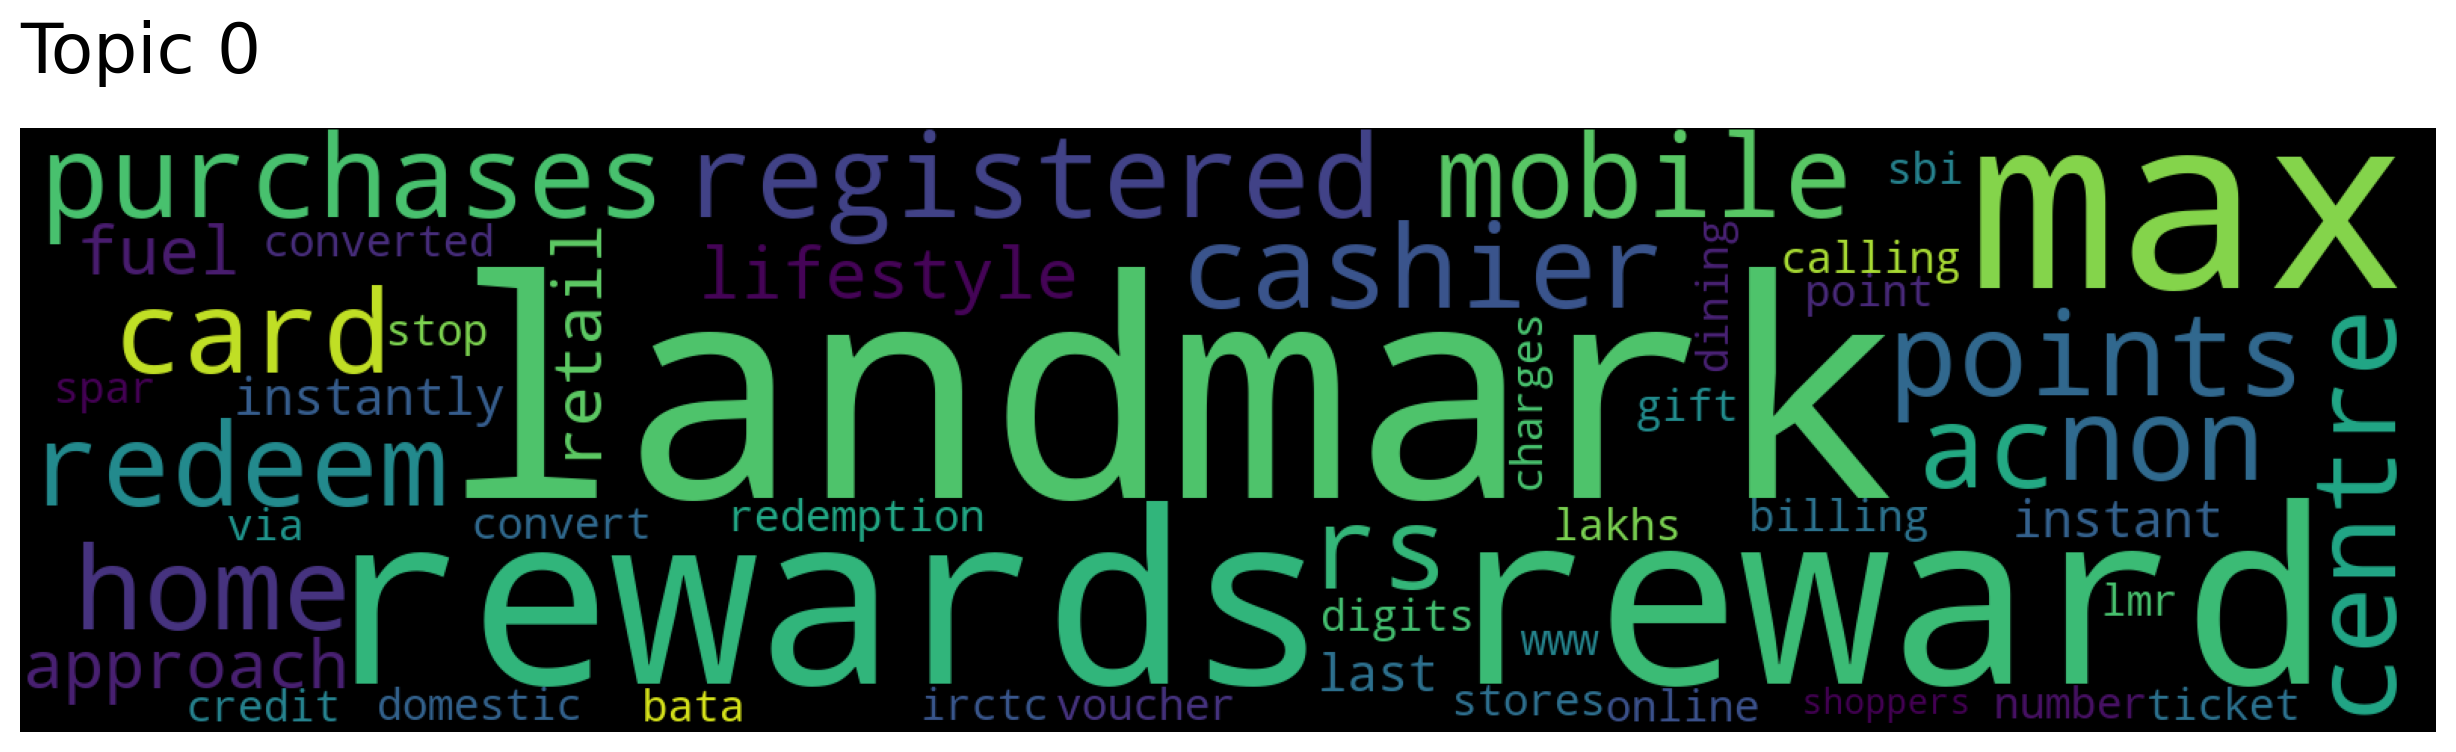

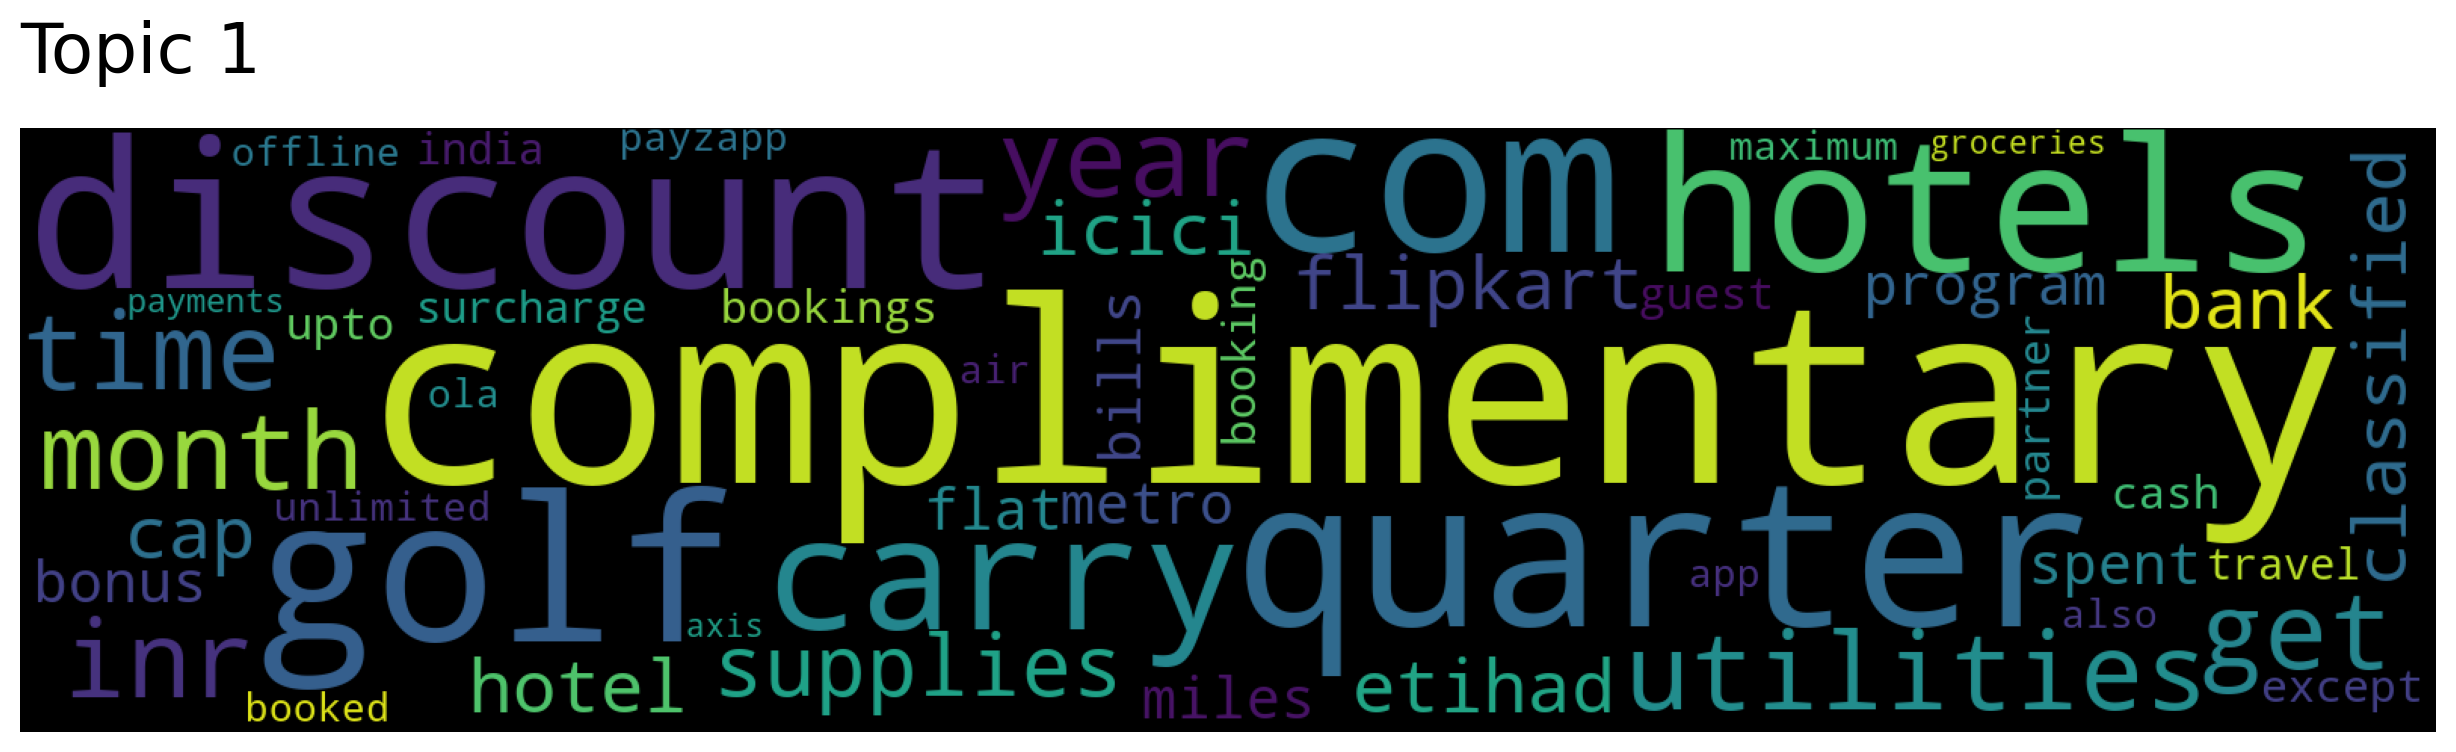

In [107]:
# Plot the resulting topics as wordclouds
for topic in topic_nums:
    topic_model.generate_topic_wordcloud(topic)